<a href="https://colab.research.google.com/github/KaueAbbe/Case_Fraude/blob/main/Analise_Exploratoria/Fraude_AnaliseExploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 7 color = 'green'> Caso de Fraude - Análise Exploratória</font>


##**Objetivo do Case**
Neste case atuarei como analista e cientista de dados, adquirindo e gerando informações sobre casos de compras fradulentas.

Como analista e cientista de dados dessa empresa passarei por todo processo de limpeza dos dados, análise exploratória e criação de um modelo de Machine Leaning para classificar possíveis compras como fraudes. O objetivo da empresa é compreender as fraudes, adquirir informações valiosas sobre e classificar compras como fraudulentas ou não.

##**Objetivos Análise Exploratória**
1. Conhecer os tipos de dados do dataset: Quantitativo ou Qualitativo
2. Calcular métricas importantes para compreender o atual estado de fraude na empresa.
2. Conhecer distribuição de dados quantitativos
3. Conhecer Estatísticas Descritivas univariadas
4. Realizar Estatística bivariada com feature target (Fraude)
5. Realizar Estatísticas Inferenciais que definem a diferença e igualdade dos grupos fraude e não fraude.
6. Realizar Data visualization com Storytelling
7. Criar regras duras para uso na empresa e simular se seria uma regra com impacto positivo ou negativo.
8. Elabora teste A/B para o uso da regra dura criada



<font size = 6 color = 'Blue'> Análise Exploratória</font>


# Importar bibliotecas e dados tratados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Python/Case/Dados_Case1_tratados.csv')
df = dados.copy()
df.head(3)

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,...,score_fraude_modelo,fraude,score_2_faltante,score_3_faltante,score_4_faltante,score_6_faltante,pais_faltante,score_9_faltante,score_10_faltante,entrega_doc_2_faltante
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,...,66,0,0,0,0,0,0,0,0,1
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,...,72,0,0,0,0,0,0,0,0,0
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,...,95,0,0,0,0,0,0,0,0,1


**Dicionário**

* score_1 a score_10: São notas de bureau de crédito que a empresa adquiriu para identificar se o comprador é confiável ou outros dados anonimizados que não temos informação sobre

* País: pais de compra

* Produto: produto que está sendo comprado no e-commerce

* Categoria_produto: categoria a qual esse produto se encaixa

* Entrega_doc_1 a entrega_doc_3: Documentos requisitados no momento de fazer a conta. 0 = N = nao entregou. Y = 1 = entregou. Se vazio, considere que nao entregou

* Score_fraude_modelo: score dado pelo modelo atual. É a probabilidade daquela compra ser uma fraude ou nao. Quanto mais próximo de 100, maior a certeza do modelo que é fraude

* Fraude: informacao se aquela compra era fraudulenta ou nao. Foi inserida após alguns dias, para termos o feedback real se de fato era fraudulenta ou nao. 0 se nao era fraudulenta e 1 se era fraudulenta

<font size =5> Pergunta 1:</font>

Quais métricas (KPIs) são importantes para o problema de fraude?

Resposta:

* KPI's são indicadores de desempenho. Métricas que avaliam informações importantes de uma dada situação.
1. Taxa de fraude: Número de fraude em razão de todas as vendas.
2. Incomming Pressure: Porcentagem de tentativas de compras provadas fraudulentas.
3. Aprovação final: Quantas transações recebidas tem status aprovado.
4. Taxa de negação: Porcentagem de transações negadas em razão de todas transações

Em Contexto de criação de modelo de Classificação Métricas importantes são:
1. Recall: Pois é uma métrica que foca na classificação de verdadeiros positivos, entre todas as classificações fraudulentas.
2. Perda de dinheiro da empresa: Neste caso, como a empresa perde 100% do valor da venda fraudada e ganha 10% de venda não fraudulenta existe um limiar entre a empresa ganhar e perder dinheiro.

<font size =5> Pergunta 2:</font>

Como estão esses nossos KPIs atualmente?

In [ ]:
dic = {}
df['fraude'].value_counts()[1]

7500

In [ ]:
#Taxa de Fraude:
taxa_fraude = df['fraude'].value_counts()[1]*100 / len(df['fraude'])
print(f'Porcentagem da taxa de fraude: {taxa_fraude}%')
dic['taxa_fraude'] = round(taxa_fraude,2)

Porcentagem da taxa de fraude: 5.0%


* Vou fazer a suposiçaõ de que acima de 0.6 o modelo antigo disse que foi fraude.

In [ ]:
#Pressão:

pressao = len(df[df['score_fraude_modelo']>60]['score_fraude_modelo']) *100 /df[df['score_fraude_modelo']>60]['fraude'].value_counts()[1]
print(f'Porcentagem de Pressão: {round(pressao,2)}%')
dic['pressao'] = round(pressao,2)



Porcentagem de Pressão: 1017.73%


Este resultado significa que o modelo impediu mais transações do que realmente eram fraudulentas.

In [ ]:
#Aprovação final
taxa_aprovacao = len(df[df['score_fraude_modelo']<=60]['score_fraude_modelo']) *100  / len(df['fraude'])
print(f'Porcentagem da taxa de fraude: {round(taxa_aprovacao,2)}%')
dic['aprovacao'] = round(taxa_aprovacao,2)

Porcentagem da taxa de fraude: 62.47%


In [ ]:
#Taxa Negação
taxa_negacao = len(df[df['score_fraude_modelo']>60]['score_fraude_modelo']) *100  / len(df['fraude'])
print(f'Porcentagem da taxa de fraude: {round(taxa_negacao,2)}%')
dic['negacao'] = round(taxa_negacao,2)

Porcentagem da taxa de fraude: 37.53%


In [ ]:
df['fraude_modelo'] = (df['score_fraude_modelo'] > 60).astype(int)
df.head()

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,...,fraude,score_2_faltante,score_3_faltante,score_4_faltante,score_6_faltante,pais_faltante,score_9_faltante,score_10_faltante,entrega_doc_2_faltante,fraude_modelo
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,...,0,0,0,0,0,0,0,0,1,1
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,...,0,0,0,0,0,0,0,0,0,1
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,...,0,0,0,0,0,0,0,0,1,1
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,...,0,0,0,0,0,0,0,0,1,0
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
#Recall
from sklearn.metrics import recall_score
recall = recall_score(df['fraude'], df['fraude_modelo'])

print(f"Recall: {recall*100:.2f}")
dic['recall'] = round(recall*100,2)

Recall: 73.76


In [ ]:
#Perda de Dinheiro da empresa
valor_negado = sum(df[df['fraude']==1]['valor_compra'])
print(f'Valor negado: {valor_negado}')
dic['valor_negado'] = round(valor_negado,2)

Valor negado: 547271.1199999993


In [ ]:
valor_negado_real = sum(df.query('fraude == 1 and fraude_modelo==1')['valor_compra'])
print(f'Valor negado_real: {valor_negado_real}')
dic['valor_negado_real'] = round(valor_negado_real,2)

Valor negado_real: 436316.8899999993


In [ ]:
valor_perdido = valor_negado - valor_negado_real
print(f'Valor perido: {valor_perdido*0.1}')
dic['valor_perdido'] = round(valor_perdido*0.1,2)

Valor perido: 11095.422999999999


In [ ]:
#Perdido por Aprovação
valor_perdido_aprovado = sum(df.query('fraude == 1 and fraude_modelo==0')['valor_compra'])
print(f'Perdido por Aprovação: {round(valor_perdido_aprovado,2)}')
dic['Perdido_aprovado'] = round(valor_perdido_aprovado,2)

#Valor de Aprovação
valor_aprovado = sum(df.query('fraude_modelo==0')['valor_compra'])
print(f'Avalor de Aprovações: {round(valor_aprovado,2)}')
dic['Valor_aprovado'] = round(valor_aprovado,2)

Perdido por Aprovação: 110954.23
Avalor de Aprovações: 3522493.2


* Este valor mostra que a empresa poderia ter lucrado R$:11092 em compras que foram aprovadas e eram fraudulentas

In [ ]:
kpis1 = pd.DataFrame(dic, index = [1])
kpis1

,taxa_fraude,pressao,aprovacao,negacao,recall,valor_negado,valor_negado_real,valor_perdido,Perdido_aprovado,Valor_aprovado
1,5.0,1017.73,62.47,37.53,73.76,547271.12,436316.89,11095.42,110954.23,3522493.2


<font size =5> Pergunta 3:</font>

Quantos estamos perdendo atualemnte em fraude x quanto estamos ganhando em aprovação?

* Em fraude estamos perdendo R$11092.29 - Este é o valor de dinheiro de compras que o modelo classificou como não fraudulenta, e que posteriormente se provou fraudulenta

* Em compras não fraudulentas: Estamos ganhando 597573.27

**IMPORTANTE**

Os dados que temos não refletem a total perda/ganho da empresa, já que temos apenas uma amostra dos dados.

In [ ]:
valor_ganhado = sum(df[df['fraude']==0]['valor_compra'])
print(f'Valor ganhado: {valor_ganhado*0.1}')
dic['valor_ganhado'] = round(valor_ganhado*0.1,2)

Valor ganhado: 598119.9000000088


In [ ]:
kpis1 = pd.DataFrame(dic, index = [1])
kpis1

,taxa_fraude,pressao,aprovacao,negacao,recall,valor_negado,valor_negado_real,valor_perdido,Perdido_aprovado,Valor_aprovado,valor_ganhado
1,5.0,1017.73,62.47,37.53,73.76,547271.12,436316.89,11095.42,110954.23,3522493.2,598119.9


# Análise Univariadas das Features

In [ ]:
df.describe()

,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,...,fraude,score_2_faltante,score_3_faltante,score_4_faltante,score_6_faltante,pais_faltante,score_9_faltante,score_10_faltante,entrega_doc_2_faltante,fraude_modelo
count,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.00000,150000.00000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,3.705407,0.730486,2.416847e+05,21.658987,0.220641,51.166187,14.193513,0.497532,2305.382387,299.709287,...,0.050000,0.08656,0.08656,0.002433,0.000073,0.001293,0.000073,0.002433,0.725713,0.375340
std,0.753206,0.127292,8.112654e+05,20.041292,2.434995,709.446986,14.161216,0.288348,1712.319718,320.728227,...,0.217946,0.28119,0.28119,0.049269,0.008563,0.035940,0.008563,0.049269,0.446156,0.484212
min,1.000000,0.000000,1.600000e-01,0.000000,0.000000,-5.000000,0.000000,0.000004,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.690200,1.157216e+04,2.000000,0.000000,1.000000,3.000000,0.246819,910.000000,42.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.755500,4.371165e+04,14.000000,0.104875,8.000000,9.000000,0.495990,1937.000000,193.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,0.801100,1.287591e+05,50.000000,0.282938,33.000000,21.000000,0.746508,3444.000000,458.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4.000000,1.000000,1.387874e+07,50.000000,833.333333,145274.000000,58.000000,0.999995,7544.000000,2225.000000,...,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   score_1                 150000 non-null  int64  
 1   score_2                 150000 non-null  float64
 2   score_3                 150000 non-null  float64
 3   score_4                 150000 non-null  float64
 4   score_5                 150000 non-null  float64
 5   score_6                 150000 non-null  float64
 6   pais                    150000 non-null  object 
 7   score_7                 150000 non-null  int64  
 8   produto                 150000 non-null  object 
 9   categoria_produto       150000 non-null  object 
 10  score_8                 150000 non-null  float64
 11  score_9                 150000 non-null  float64
 12  score_10                150000 non-null  float64
 13  entrega_doc_1           150000 non-null  int64  
 14  entrega_doc_2       

### Fraude

<Axes: >

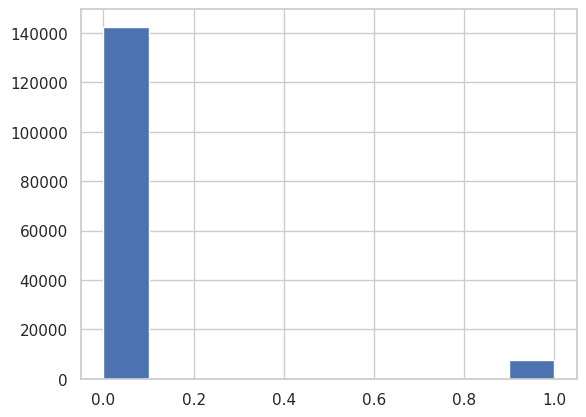

In [ ]:
df['fraude'].hist()

* Há desbalanceamento na feature target, com muitos dados sendo não fraudulentos.


### Scores
* Os Scores tem escalas muito diferentes. Ainda mais que os outliers estão presentes.

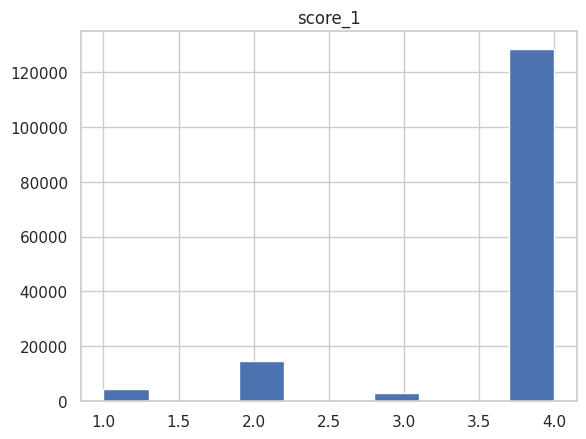

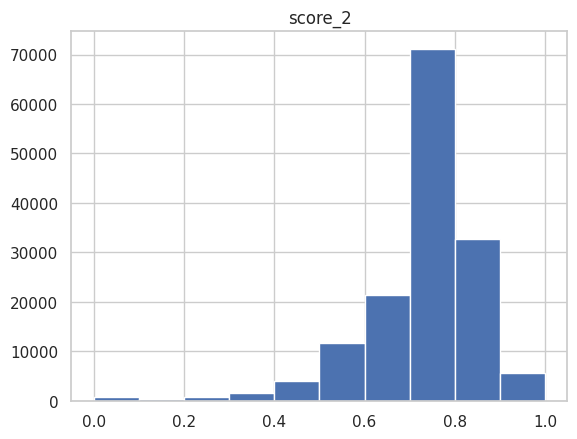

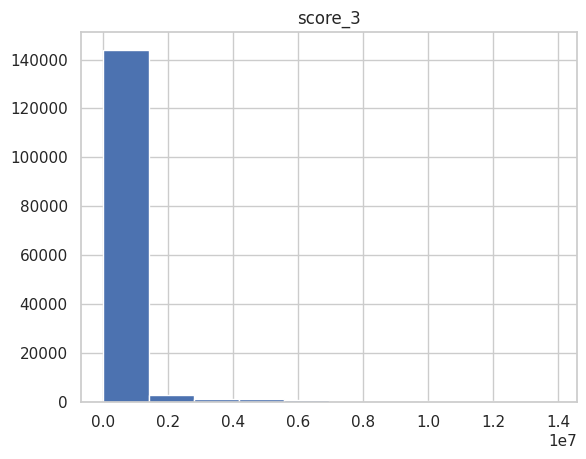

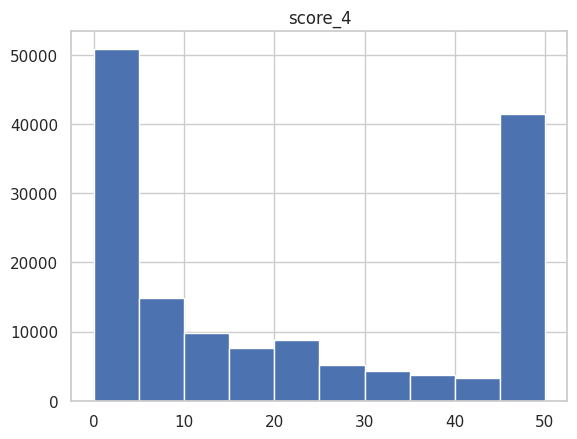

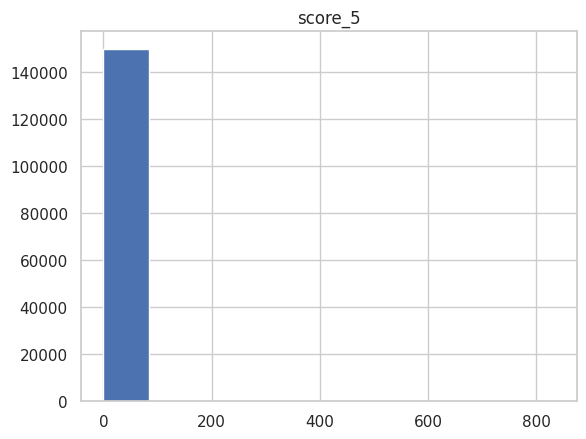

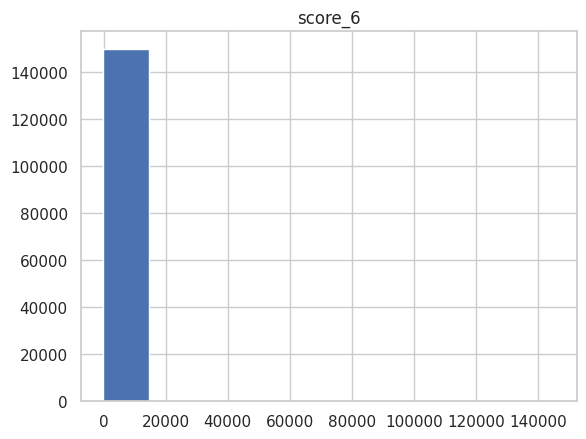

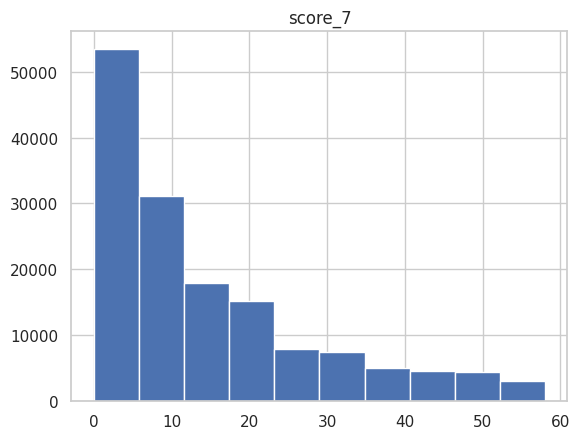

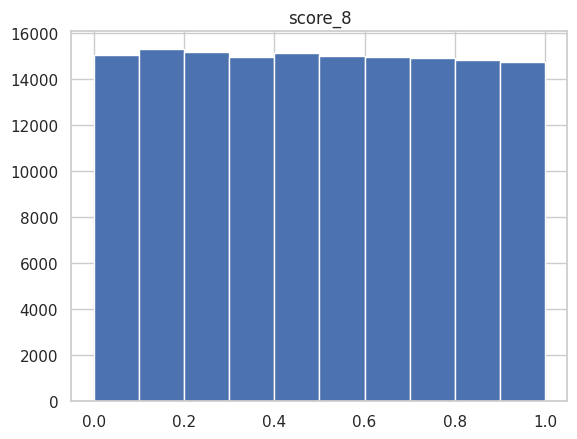

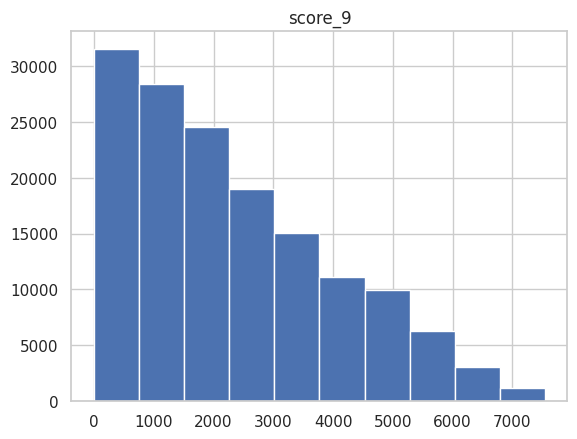

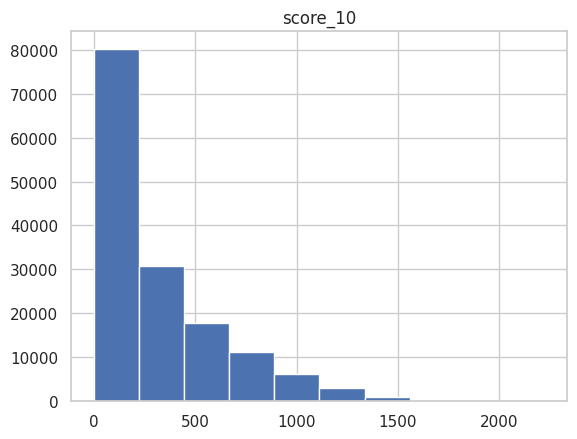

In [ ]:
for i in ['score_' + str(x) for x in range(1, 11)]:
  df[i].hist()
  plt.title(i)
  plt.show()

In [ ]:
df['score_5'].describe()

count    150000.000000
mean          0.220641
std           2.434995
min           0.000000
25%           0.000000
50%           0.104875
75%           0.282938
max         833.333333
Name: score_5, dtype: float64

In [ ]:
df[df['score_5'] > 1]

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,...,fraude,score_2_faltante,score_3_faltante,score_4_faltante,score_6_faltante,pais_faltante,score_9_faltante,score_10_faltante,entrega_doc_2_faltante,fraude_modelo
7,4,0.6806,1656.95,50.0,1.043077,0.0,BR,11,Tripa Para Fazer Linguiça - 45 Metros Long Short,cat_e686ce3,...,0,0,0,0,0,0,0,0,1,1
65,4,0.5470,71444.09,24.0,2.713101,7.0,AR,39,Cuaderno De Caligrafia Nº 2 Plantec Normas Iram,cat_3203c7c,...,0,0,0,0,0,0,0,0,1,0
74,4,0.7493,48239.05,1.0,1.243750,1.0,GB,16,Chá Erva De São João 500 G,cat_381751d,...,0,0,0,0,0,0,0,0,1,0
80,1,0.7713,5541017.31,5.0,2.060997,3.0,BR,17,Controle R.tv Lcd/led Samsung Smart Tv Função ...,cat_d018e12,...,0,0,0,0,0,0,0,0,1,1
104,1,0.7807,4635934.05,7.0,2.420968,0.0,BR,5,Kit 2 Capa Borracha Chave Canivete Hyundai I30...,cat_9b82fbd,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149855,4,0.7626,30089.54,1.0,1.054803,371.0,BR,9,Controle Remoto Tv Samsung 32 Smart 3d Led Un3...,cat_d018e12,...,0,0,0,0,0,0,0,0,0,0
149866,4,0.7881,54002.08,38.0,1.135965,1.0,BR,7,Cadeado Para Bicicleta Com Senha Segredo Bike ...,cat_e9110c5,...,0,0,0,0,0,0,0,0,1,0
149874,4,0.4535,117322.68,14.0,1.528341,0.0,US,27,Luz Led Inodoro 8 Colores Rgb Baño Sensor Dete...,cat_a8a5e79,...,0,0,0,1,0,0,0,1,1,0
149877,4,0.8611,19137.57,2.0,1.803653,0.0,BR,3,Sabonete Infantil Em Barra Huggies 75g,cat_5cca8c4,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
df['score_6'].describe()

count    150000.000000
mean         51.166187
std         709.446986
min          -5.000000
25%           1.000000
50%           8.000000
75%          33.000000
max      145274.000000
Name: score_6, dtype: float64

In [ ]:
df[df['score_6'] > 33]

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,...,fraude,score_2_faltante,score_3_faltante,score_4_faltante,score_6_faltante,pais_faltante,score_9_faltante,score_10_faltante,entrega_doc_2_faltante,fraude_modelo
5,4,0.7359,42727.15,50.0,0.000000,47.0,BR,1,Kit Gamer Teclado Hedfone Mouse E Mousepad,cat_9d78e2e,...,0,0,0,0,0,0,0,0,1,0
9,4,0.4759,40143.12,50.0,0.000000,41.0,AR,3,Gamepad Joystick Para Telefono Celular Android...,cat_5d79fb9,...,0,0,0,0,0,0,0,0,1,0
10,4,0.8353,121926.06,39.0,0.186957,34.0,BR,24,Escova Dental Curaprox 5460 Ultra Soft Com 3 U...,cat_4744ece,...,0,0,0,0,0,0,0,0,0,0
12,4,0.7688,440434.49,50.0,0.000000,78.0,BR,17,Câmera Sony Mirrorless Alpha A6500 (corpo) Gar...,cat_d3aa8de,...,0,0,0,0,0,0,0,0,1,1
15,4,0.7072,171679.52,1.0,0.592092,101.0,AR,15,Canasto Organizador Ratan Plastico Mediano Tap...,cat_82dfc13,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149986,4,0.7173,880101.29,20.0,0.203448,34.0,BR,19,Suporte De Mesa Universal Celular Tablet Smart...,cat_6482815,...,0,0,0,0,0,0,0,0,0,0
149989,1,0.8374,378132.05,2.0,0.083649,121.0,BR,3,Microondas Lg Ms3052r(a) Branco 30l 220v,cat_534ea1e,...,0,0,0,0,0,0,0,0,1,0
149990,4,0.6529,291288.17,33.0,0.000000,38.0,AR,6,Camara Ip Espia Lampara Foco Wifi Inalambrica ...,cat_f8b3160,...,0,0,0,0,0,0,0,0,1,0
149998,4,0.6067,152906.86,1.0,0.099175,133.0,BR,3,Tela Display Lcd Galaxy J7 Neo J701 Com Brilho...,cat_237e2d0,...,0,0,0,0,0,0,0,0,1,0


* As distribuições mostram que existem muitos valores outliers, porém são outliers reais de compras e não outliers de erros.

### Valor Compra

<Axes: >

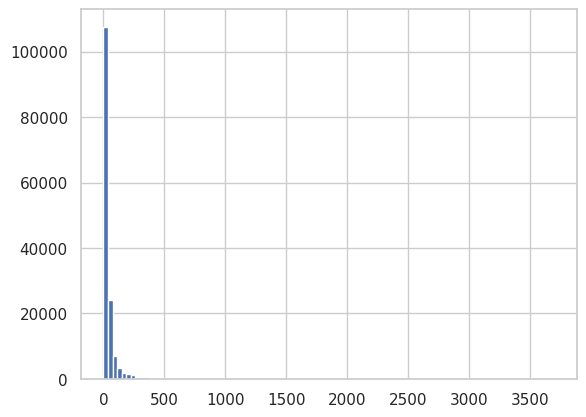

In [ ]:
df['valor_compra'].hist(bins = 100)

* A maioria das compras são abaixo de $250. Valor de compras também possui outliers.

### Entrega de Documentos

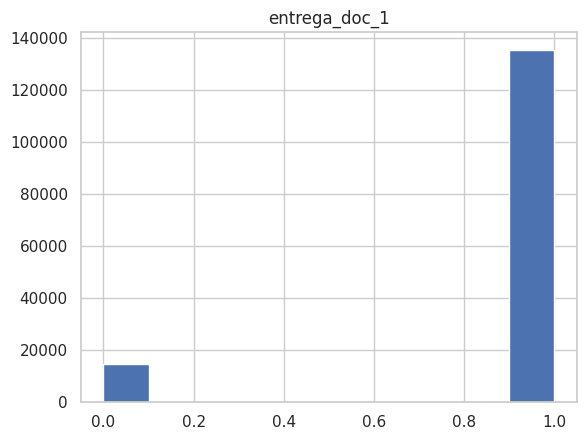

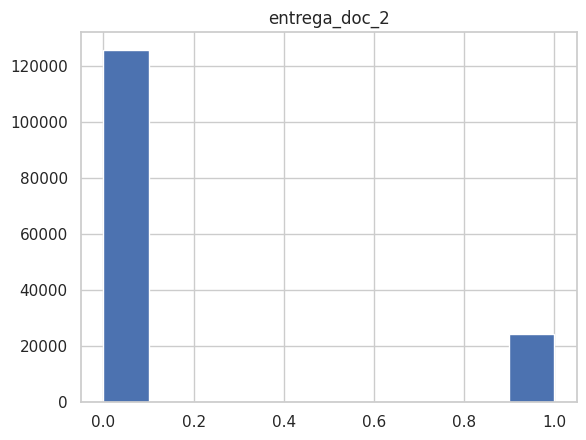

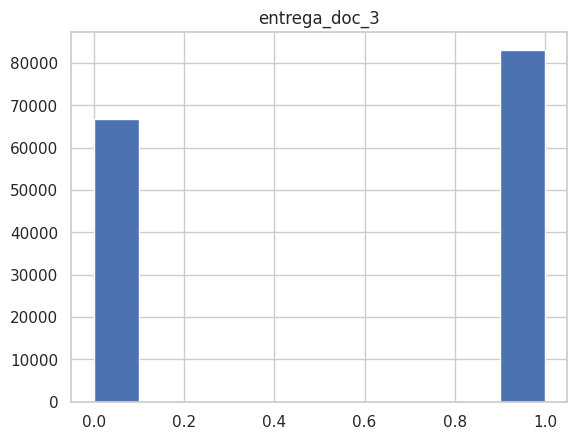

In [ ]:
for i in ['entrega_doc_' + str(x) for x in range(1, 4)]:
  df[i].hist()
  plt.title(i)
  plt.show()

* Documento 2 é o documento com mais faltas
* Documento 3 está quase balanceado de faltas
* Documento 1 é que tem menos falta

### Quantos Países tem?

51 Países

In [ ]:
len(df['pais'].unique())

51

### Quantas categorias tem?

8323

In [ ]:
len(df['categoria_produto'].unique())

8324

### Score_fraude


<Axes: >

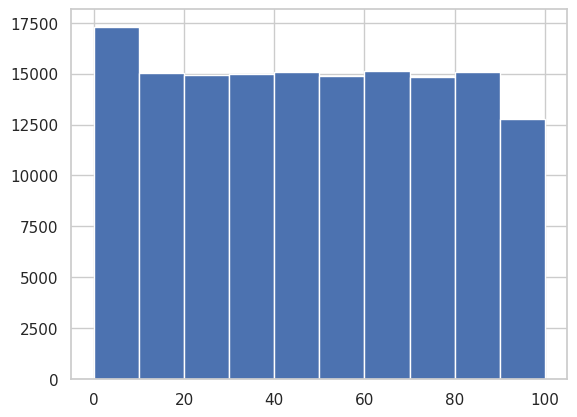

In [ ]:
df['score_fraude_modelo'].hist()

* Quase uma distribuição uniforme

* Existem menos compras fraudulentas do que não fraudulentas.

# Análise Bivariada

* Entender o perfil do fraudador

In [ ]:
agrupado = df.groupby(by = 'fraude')
agrupado['score_1'].agg(['mean','std'])

,mean,std
fraude,,
0,3.715719,0.741333
1,3.509467,0.929601


In [ ]:
media = agrupado['score_1'].agg(['mean','std'])['mean']
media.index

Int64Index([0, 1], dtype='int64', name='fraude')

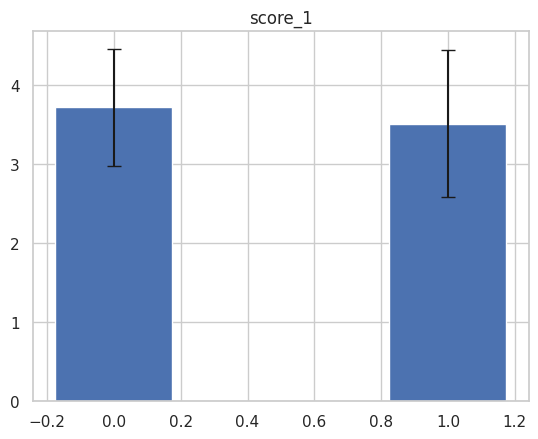

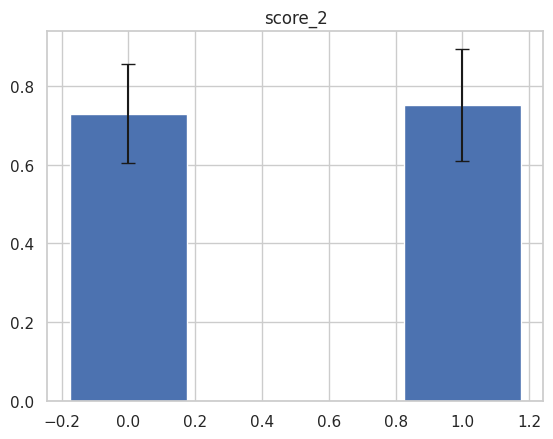

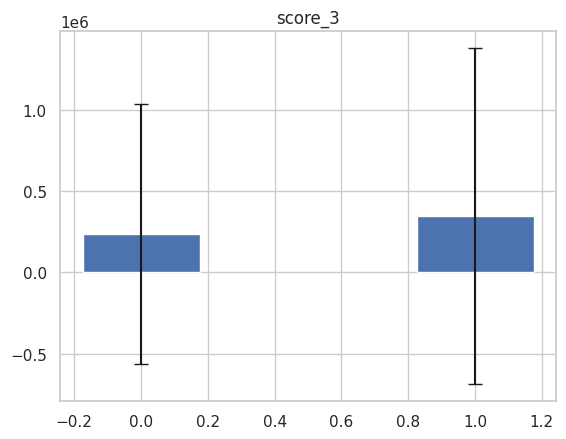

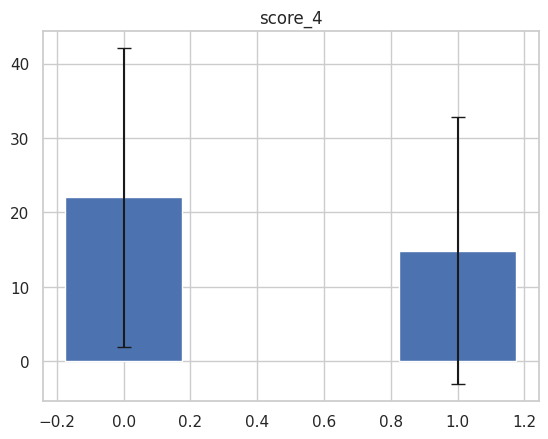

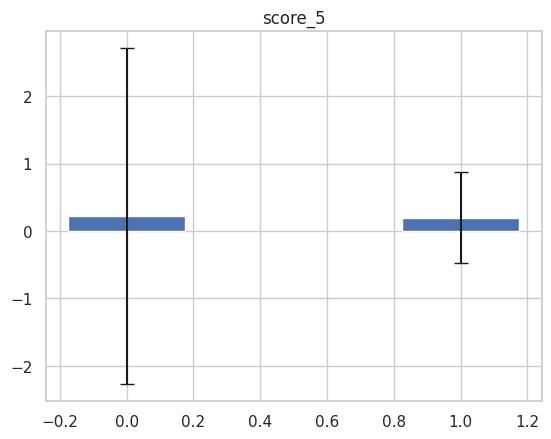

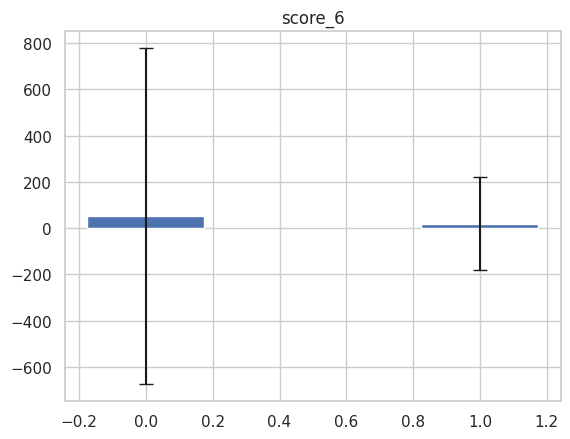

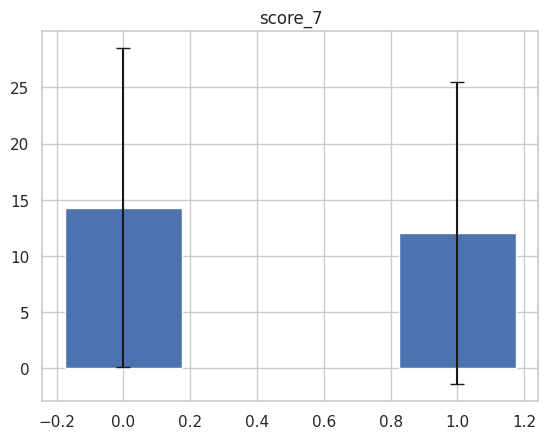

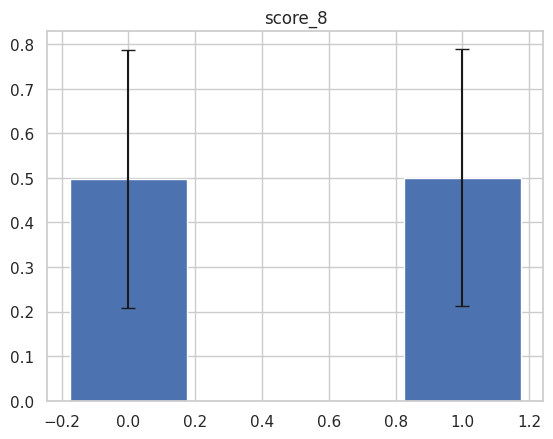

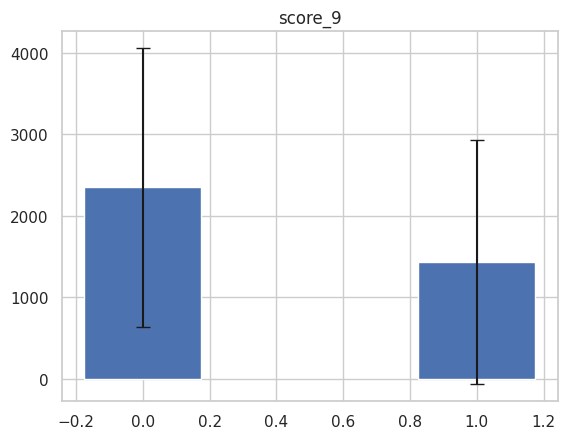

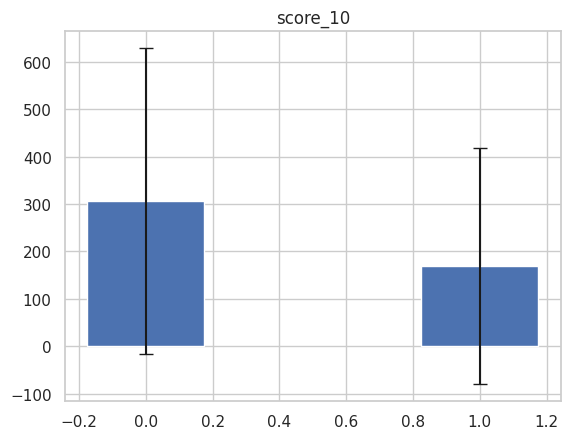

In [ ]:
#Scores
for i  in ['score_' + str(x) for x in range(1, 11)]:
  media = agrupado[i].agg(['mean','std'])['mean']
  desvio = agrupado[i].agg(['mean','std'])['std']

  largura_barra = 0.35
  indices = media.index
  fig, ax = plt.subplots()
  barras = ax.bar(indices, media, largura_barra, yerr=desvio, capsize=5)
  plt.title(i)
  plt.show()


In [ ]:
for i  in ['score_' + str(x) for x in range(1, 11)]:
  grupo1 = df.query('fraude ==0')[i].values
  grupo2 = df.query('fraude ==1')[i].values

  statistic, p_value = stats.mannwhitneyu(grupo1, grupo2)
  alpha = 0.05

  # Avalie a hipótese nula com base no valor de p
  print(i)
  if p_value < alpha:
      print("Rejeitamos a hipótese nula: As médias não são iguais.")
  else:
      print("Não podemos rejeitar a hipótese nula: Não há evidência suficiente para afirmar que as médias são diferentes.")

score_1
Rejeitamos a hipótese nula: As médias não são iguais.
score_2
Rejeitamos a hipótese nula: As médias não são iguais.
score_3
Rejeitamos a hipótese nula: As médias não são iguais.
score_4
Rejeitamos a hipótese nula: As médias não são iguais.
score_5
Rejeitamos a hipótese nula: As médias não são iguais.
score_6
Rejeitamos a hipótese nula: As médias não são iguais.
score_7
Rejeitamos a hipótese nula: As médias não são iguais.
score_8
Não podemos rejeitar a hipótese nula: Não há evidência suficiente para afirmar que as médias são diferentes.
score_9
Rejeitamos a hipótese nula: As médias não são iguais.
score_10
Rejeitamos a hipótese nula: As médias não são iguais.


* Apenas score 3 e 8 não são diferentes. De resto as médias são diferentes.

### Entrega Doc

In [ ]:
#Entrega Doc
df.groupby(by = 'fraude').agg('mean')[['entrega_doc_' + str(x) for x in range(1, 4)]]

<ipython-input-83-85135c620b2a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by = 'fraude').agg('mean')[['entrega_doc_' + str(x) for x in range(1, 4)]]


,entrega_doc_1,entrega_doc_2,entrega_doc_3
fraude,,,
0,0.913775,0.158154,0.566372
1,0.685333,0.207200,0.322800


* Com excessão do documento 2, compras não fraudulentas tendem a aprender mais o documento.
* O documento 2 é documento menos apresentado.

### Valor de Compra

In [ ]:
grupo1 = df.query('fraude ==0')['valor_compra'].values
grupo2 = df.query('fraude ==1')['valor_compra'].values

statistic, p_value = stats.mannwhitneyu(grupo1, grupo2)
alpha = 0.05

# Avalie a hipótese nula com base no valor de p
if p_value < alpha:
    print("Rejeitamos a hipótese nula: As médias não são iguais.")
else:
    print("Não podemos rejeitar a hipótese nula: Não há evidência suficiente para afirmar que as médias são diferentes.")

Rejeitamos a hipótese nula: As médias não são iguais.


In [ ]:
df.groupby(by = 'fraude').agg('mean')[['valor_compra']]

<ipython-input-85-7a5ea07367dd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by = 'fraude').agg('mean')[['valor_compra']]


,valor_compra
fraude,
0,41.973326
1,72.969483


* Compras fraudulentas tendem a ser mais caras

In [ ]:
agrupado['score_fraude_modelo'].agg(['mean','std'])

,mean,std
fraude,,
0,46.917207,28.361699
1,69.897867,32.084832


In [ ]:
grupo1 = df.query('fraude ==0')['score_fraude_modelo'].values
grupo2 = df.query('fraude ==1')['score_fraude_modelo'].values

statistic, p_value = stats.mannwhitneyu(grupo1, grupo2)
alpha = 0.05

# Avalie a hipótese nula com base no valor de p
if p_value < alpha:
    print("Rejeitamos a hipótese nula: As médias não são iguais.")
else:
    print("Não podemos rejeitar a hipótese nula: Não há evidência suficiente para afirmar que as médias são diferentes.")

Rejeitamos a hipótese nula: As médias não são iguais.


* As médias dos grupos quanto ao modelo não são iguais

In [ ]:
balanced_data = pd.concat([
    df[df['fraude'] == 0].sample(df['fraude'].sum()),
    df[df['fraude'] == 1]
])
balanced_data.head(2)

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,...,fraude,score_2_faltante,score_3_faltante,score_4_faltante,score_6_faltante,pais_faltante,score_9_faltante,score_10_faltante,entrega_doc_2_faltante,fraude_modelo
16387,4,0.7565,530964.68,2.0,0.516206,8.0,BR,32,Forever Liss Desmaia Cabelo Máscara Hidratante...,cat_be0af8e,...,0,0,0,0,0,0,0,0,1,0
115910,4,0.7571,711928.69,50.0,0.000000,24.0,BR,6,Kit 20 Spot Led Smd 7w Dicróica Direcionável R...,cat_45398dd,...,0,0,0,0,0,0,0,0,1,0


<Figure size 1200x800 with 0 Axes>

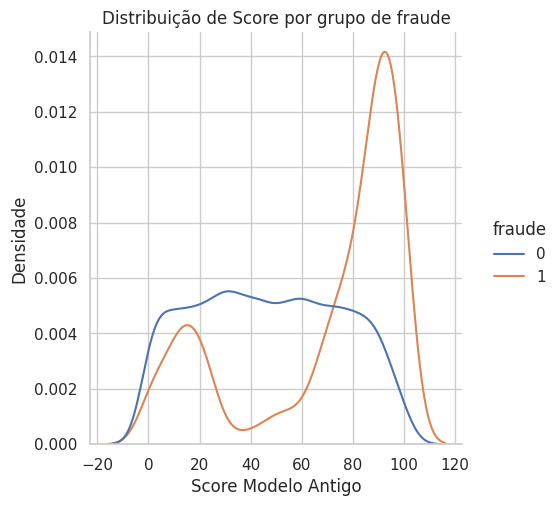

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

#sns.displot(balanced_data[balanced_data['fraude'] == 0]['score_fraude_modelo'], kde=True, label='Não Fraude')
#sns.displot(balanced_data[balanced_data['fraude'] == 1]['score_fraude_modelo'], kde=True, label='Fraude')

sns.displot(data = balanced_data,x = 'score_fraude_modelo', hue = 'fraude', kind =  'kde')

plt.xlabel('Score Modelo Antigo')
plt.ylabel('Densidade')
plt.title('Distribuição de Score por grupo de fraude')

plt.show()

* Vemos neste gráfico que a distribuição do score do modelo antigo não apresenta boa separação entre os grupos de compras fraudes e não fraudes.

* Objetivo a se atingir na criação do modelo é fazer um modelo com melhor separação entre essas distribuições.

#### Conclusão de Análise Bivariada
1. Os scores (excessão 3 e 8) difererem entre os grupos de fraude e não fraude.
2. Os documentos (com excessão do 2) são menos apresentados em compras fraudulentas.
3. Compras fraudulentas tendem a gastar mais em média.
4. O modelo antigo separava bem os modelos de fraude dos não fraude. O score dos fraudulentas era em média maior.

In [ ]:
agrupado['pais'].agg(['count'])

,count
fraude,
0,142500
1,7500


In [ ]:
cat_fraude = pd.crosstab(df['categoria_produto'], df['fraude']).sort_values(by = 1, ascending = False).head()
cat_fraude

fraude,0,1
categoria_produto,,
cat_43b9c10,1951,380
cat_d9753d4,338,115
cat_4249bd8,1093,98
cat_8ef7164,828,81
cat_6c4cfdc,1375,74


## Data Visualization

In [ ]:
kpis1

,taxa_fraude,pressao,aprovacao,negacao,recall,valor_negado,valor_negado_real,valor_perdido,Perdido_aprovado,Valor_aprovado,valor_ganhado
1,5.0,1017.73,62.47,37.53,73.76,547271.12,436316.89,11095.42,110954.23,3522493.2,598119.9


In [ ]:
KPI = pd.DataFrame(dic, index = [1])
kpi_data = KPI.T.loc[['taxa_fraude', 'pressao', 'aprovacao', 'negacao', 'recall', 'valor_perdido', 'valor_ganhado']]
kpi_data.rename(columns = {1:'KPIS'}, inplace = True)
kpi_data

,KPIS
taxa_fraude,5.00
pressao,1017.73
aprovacao,62.47
negacao,37.53
recall,73.76
valor_perdido,11095.42
valor_ganhado,598119.90


# Porcentagem de Entrega de Documento

In [ ]:
doc_fraude = df.query('fraude == 1')[['entrega_doc_' + str(x) for x in range(1, 4)]]
doc_fraude.head(3)

,entrega_doc_1,entrega_doc_2,entrega_doc_3
16,0,0,0
45,1,1,1
69,1,0,1


In [ ]:
doc_fraude['entrega_doc_1'].value_counts(normalize = True)

1    0.685333
0    0.314667
Name: entrega_doc_1, dtype: float64

In [ ]:
doc_fraude['entrega_doc_2'].value_counts(normalize = True)

0    0.7928
1    0.2072
Name: entrega_doc_2, dtype: float64

In [ ]:
doc_fraude['entrega_doc_3'].value_counts(normalize = True)

0    0.6772
1    0.3228
Name: entrega_doc_3, dtype: float64

In [ ]:
documentos = ['Documento 1', 'Documento 2' ,'Documento 3']
taxa = [0.685504,0.207081,0.322912]
porcentagem = []
for i in taxa:
  porcentagem.append(round(i*100, 2))
porcentagem

[68.55, 20.71, 32.29]

In [ ]:
dic = {}
for i in range(0, 3):
  dic[documentos[i]] = porcentagem[i]
df_doc = pd.DataFrame(dic, index = ['valores']).T
df_doc = df_doc.sort_values('valores', ascending = False)
df_doc

,valores
Documento 1,68.55
Documento 3,32.29
Documento 2,20.71


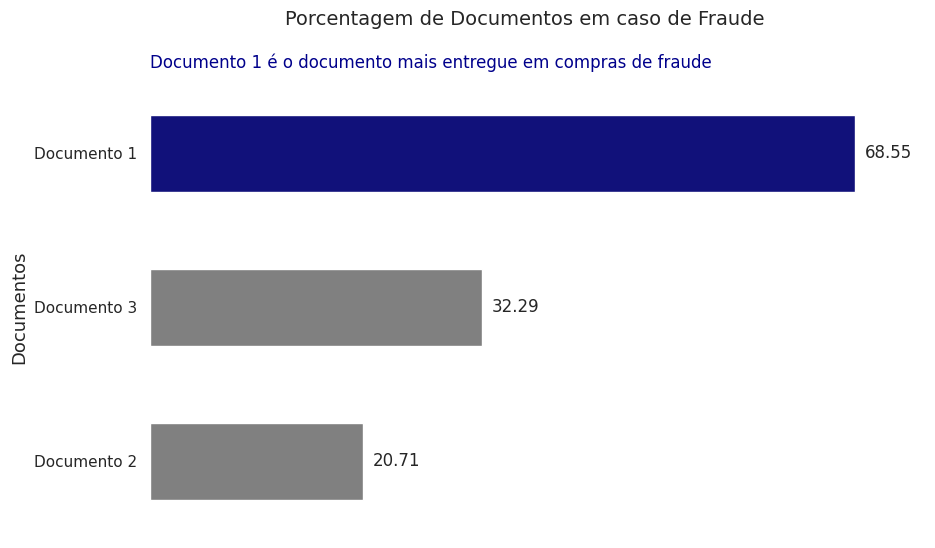

In [ ]:
plt.figure(figsize = (10, 6))
cores = ['darkblue', 'gray', 'gray']
ax = sns.barplot( data = df_doc, y = df_doc.index, x = 'valores', palette = cores, width = 0.5)

plt.suptitle('Porcentagem de Documentos em caso de Fraude', fontsize = 14, y = 0.99)
plt.ylabel('Documentos', fontsize = 13)
plt.title('Documento 1 é o documento mais entregue em compras de fraude', fontsize = 12, loc = 'left', color = 'darkblue')

plt.gca().get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_color('none')  # Remove a borda inferior (eixo x)
ax.spines['left'].set_color('none')
plt.margins(x=0.1)

for i, barra in enumerate(ax.patches):
      valor = df_doc['valores'].iloc[i]
      largura_barra = barra.get_width()
      ax.text(largura_barra +1 , barra.get_y() + barra.get_height() / 2, f'{valor}', va='center')

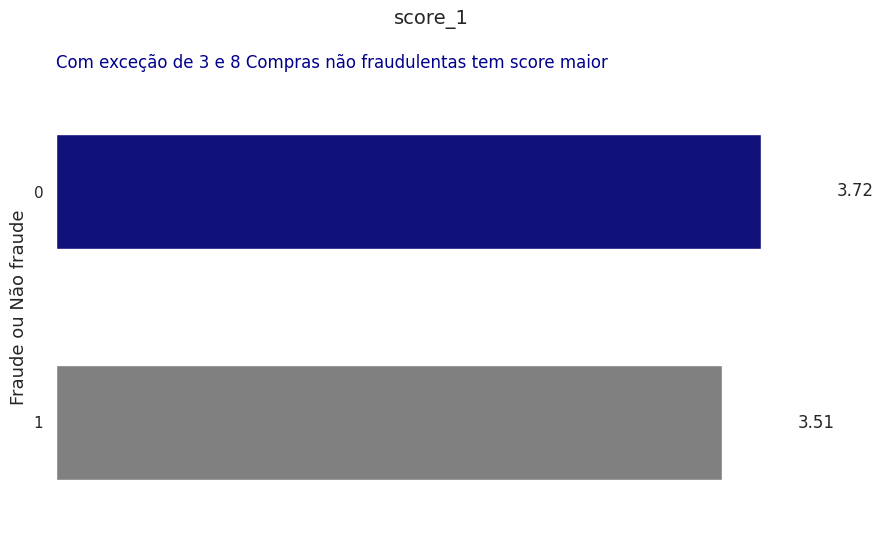

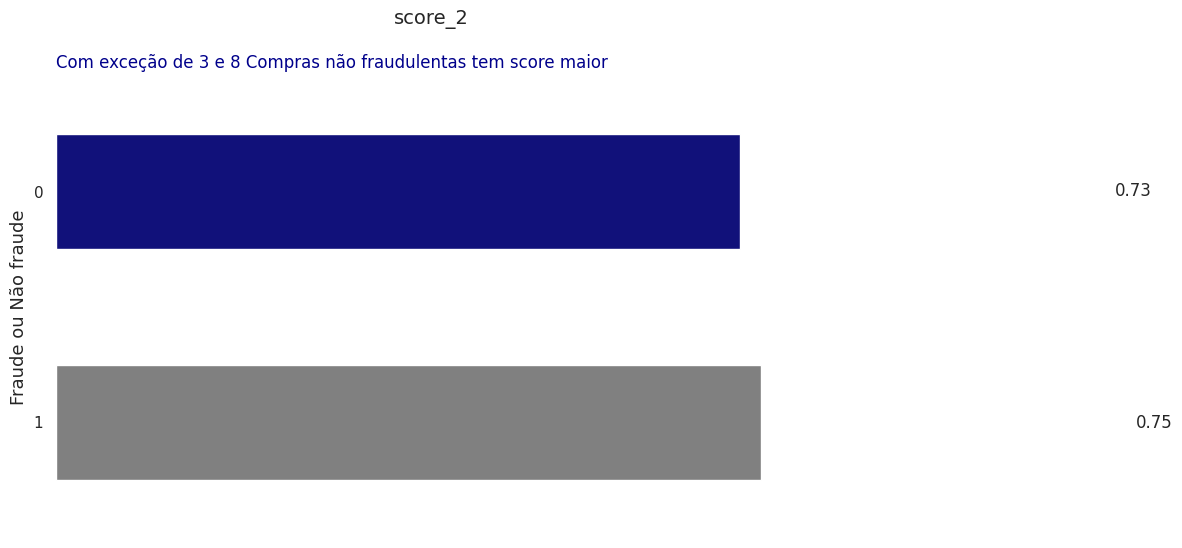

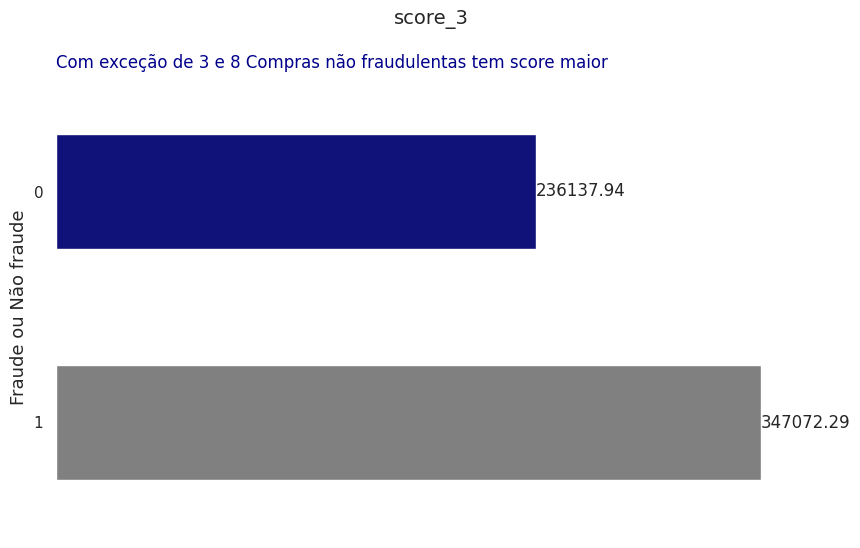

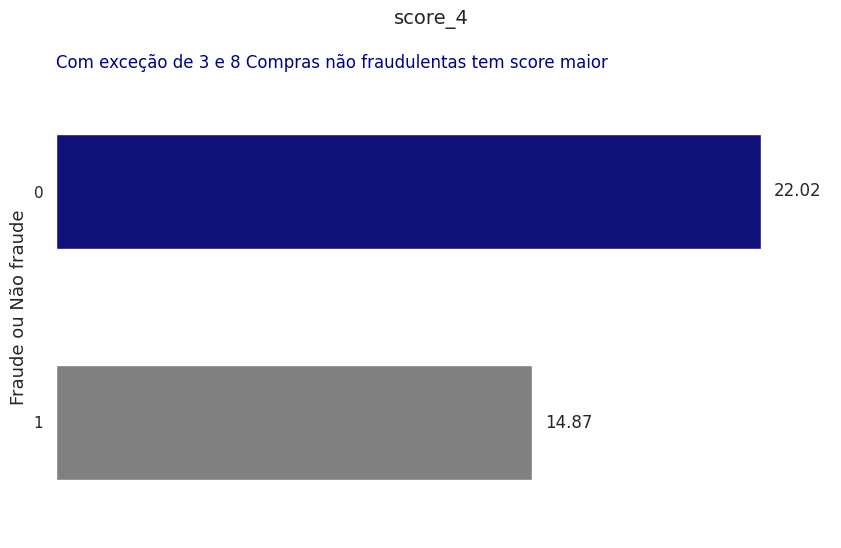

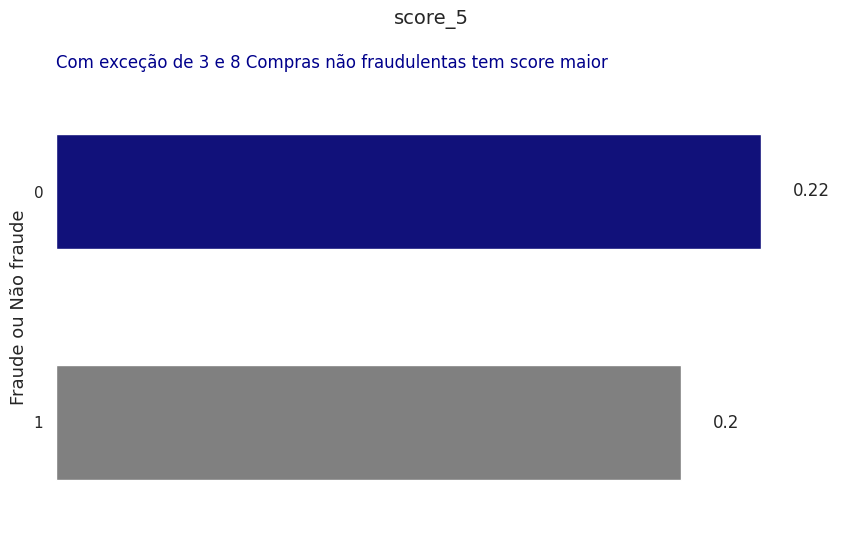

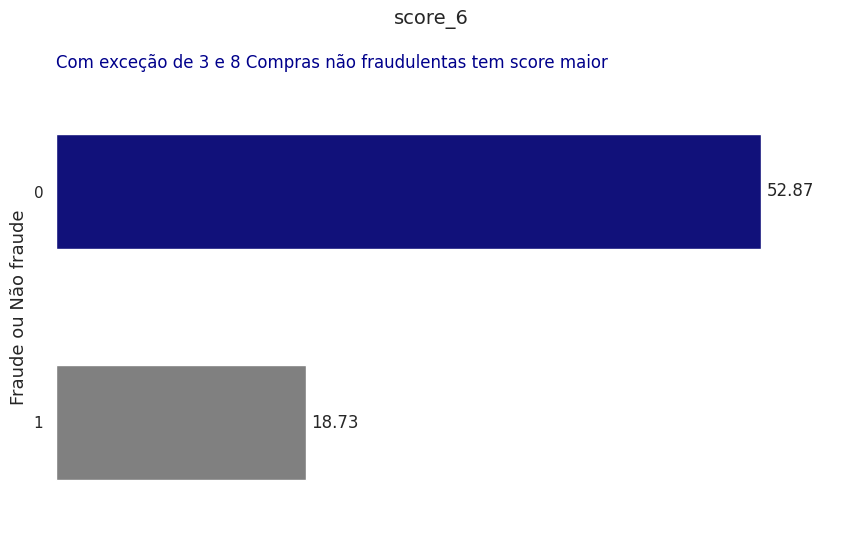

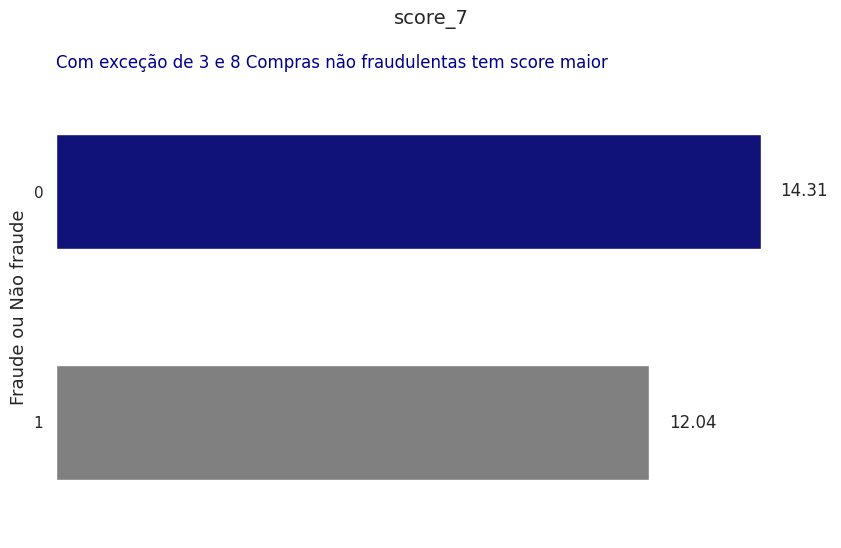

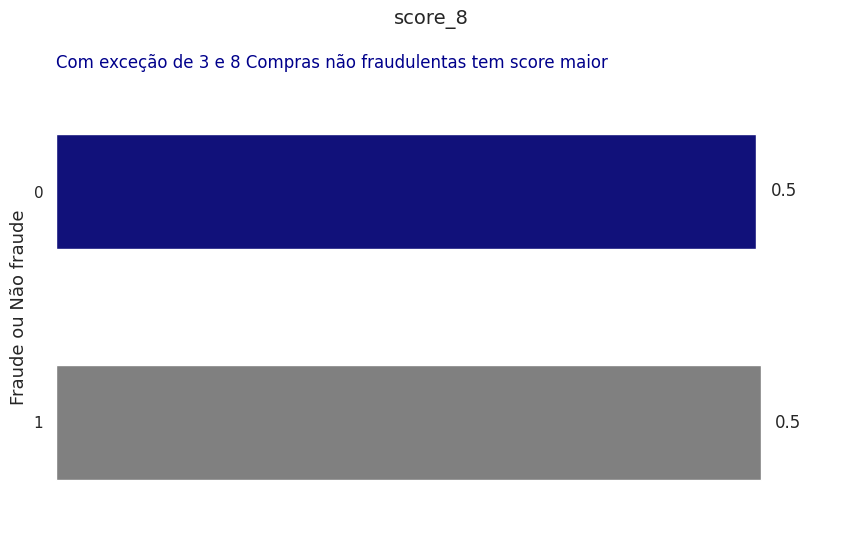

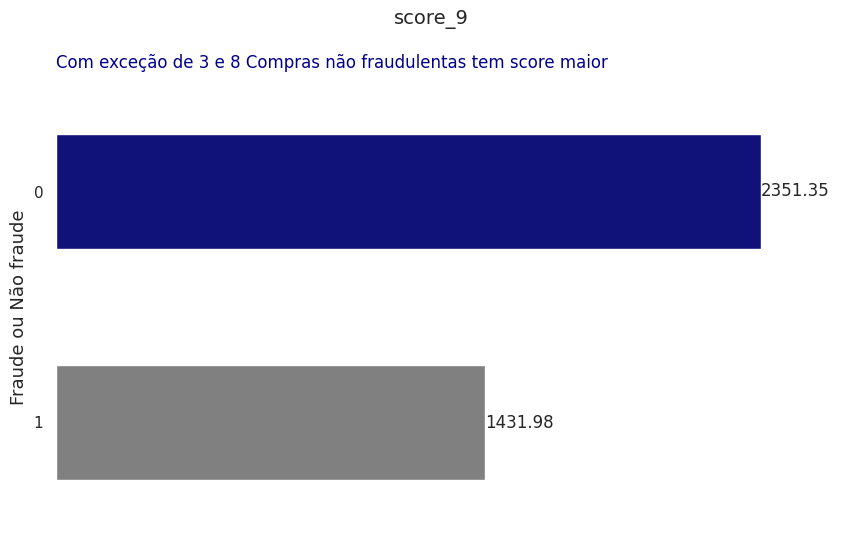

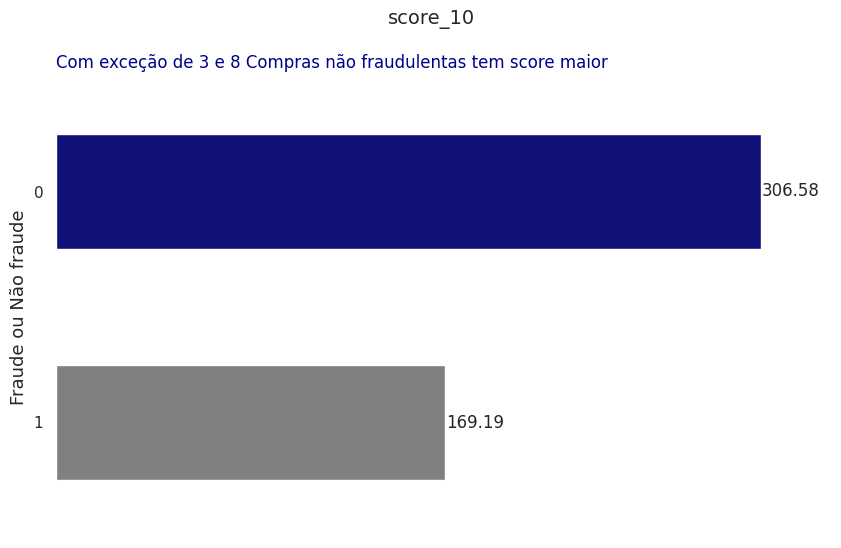

In [ ]:
for i  in ['score_' + str(x) for x in range(1, 11)]:
  plt.figure(figsize = (10, 6))

  media = agrupado[i].agg(['mean','std'])['mean']

  cores = ['darkblue', 'gray']
  ax = sns.barplot(data = media, y = ['0', '1'] , x = media.index, palette = cores, width = 0.5, orient= 'h')
  plt.suptitle(i, fontsize = 14, y = 0.99)
  plt.ylabel('Fraude ou Não fraude', fontsize = 13)
  plt.title(r'Com exceção de 3 e 8 Compras não fraudulentas tem score maior', fontsize = 12, loc = 'left', color = 'darkblue')

  plt.gca().get_xaxis().set_visible(False)
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')
  ax.spines['bottom'].set_color('none')  # Remove a borda inferior (eixo x)
  ax.spines['left'].set_color('none')
  plt.margins(x=0.1)
  for i, barra in enumerate(ax.patches):
      valor = round(media.values[i],2)
      largura_barra = barra.get_width()
      if valor <= 0.7:
        ax.text(largura_barra +0.01 , barra.get_y() + barra.get_height() / 2, f'{valor}', va='center')
      else:
        ax.text(largura_barra +0.4 , barra.get_y() + barra.get_height() / 2, f'{valor}', va='center')
  plt.show()

## Analisando Colunas Missing

In [ ]:
colunas_missing = ['score_2_faltante', 'score_3_faltante', 'score_4_faltante',
       'score_6_faltante', 'pais_faltante', 'score_9_faltante',
       'score_10_faltante', 'entrega_doc_2_faltante']

In [ ]:
agrupado[colunas_missing].sum()

,score_2_faltante,score_3_faltante,score_4_faltante,score_6_faltante,pais_faltante,score_9_faltante,score_10_faltante,entrega_doc_2_faltante
fraude,,,,,,,,
0,12155,12155,336,11,179,11,336,106620
1,829,829,29,0,15,0,29,2237


* As somas dos dados missings de cada grupo mostram que existem mais dados faltantes para compras que **não** foram fraudadas.
* Existe diferença entre o grupo fraude e não fraude quanto a existência de valores missing.

# Pergunta 6:

* Use alguns algoritmos para melhor entendimento do perfil de fraude.

In [ ]:
# Separar as características (X) e a variável de destino (y)
X = df.drop(['fraude', 'pais', 'produto', 'categoria_produto', 'data_compra', 'fraude_modelo', 'score_fraude_modelo'], axis=1)
y = df['fraude']

# Inicializar e treinar o modelo de regressão logística
model = LogisticRegression(max_iter = 500)
model.fit(X, y)

# Obter os coeficientes do modelo
coefficients = model.coef_[0]
feature_names = X.columns

# Crie um DataFrame para visualizar os coeficientes com os nomes das características
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Ordenar os coeficientes em ordem decrescente de importância
coef_df = coef_df.sort_values(by='Coefficient', ascending=True)

# Exibir os coeficientes
coef_df


,Feature,Coefficient
6,score_7,-5.395536e-02
3,score_4,-2.803091e-02
0,score_1,-1.384617e-02
21,entrega_doc_2_faltante,-4.103941e-03
1,score_2,-2.488217e-03
10,entrega_doc_1,-2.413391e-03
7,score_8,-1.713179e-03
9,score_10,-1.598104e-03
4,score_5,-1.003103e-03
8,score_9,-7.377518e-04


In [ ]:
# Separar as características (X) e a variável de destino (y)
X = df.drop(['fraude', 'pais', 'produto', 'categoria_produto', 'data_compra', 'fraude_modelo', 'score_fraude_modelo'], axis=1)
y = df['fraude']

# Inicializar e treinar o modelo
tree_model = DecisionTreeClassifier(max_depth = 10)
tree_model.fit(X, y)

# Obter os coeficientes do modelo
importances = tree_model.feature_importances_
feature_names = X.columns

# Crie um DataFrame para visualizar os coeficientes com os nomes das características
importance_df  = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar a importância das features em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibir a importância das features
importance_df


,Feature,Importance
21,entrega_doc_2_faltante,0.199115
10,entrega_doc_1,0.173240
13,valor_compra,0.100992
9,score_10,0.093028
2,score_3,0.087121
8,score_9,0.061714
11,entrega_doc_2,0.048445
0,score_1,0.046854
1,score_2,0.040404
5,score_6,0.038651


In [ ]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(tree_model, out_file=None,
                                filled=True, rounded=True,
                                special_characters=True)

# Visualizar o gráfico da árvore
graph = graphviz.Source(dot_data)
graph.view()

'Source.gv.pdf'

* Features mais importantes:
1. Valor
2. Score 7, 4, 1, 9, 10,2
3. Entrega doc 1
4. Documento 3 é mais importante que o documento 2
* Os scores 3 e 8 não possuem diferenças estatísticas

* Features Faltantes
1. Faltar o documento 2 é uma feature importante para a tomada de decisão
2. As demais features faltantes não apresentam forte impacto na decisão do modelo

## Perguntas Sênior
### 1. “Regras duras” para evitarmos fraude sem o uso de machine learning.
- Como documento e valor aparecem como importante então uma regra poderia ser: Se o valor atingir for um desvio padrão acima da média de não fraude, E não aprensentar documento 1 e 3 então barre a compra.



### 2. Prós e Contras dessa estratégia:

* **Prós:**

1 - Aumenta o uso de documentações para realizar compras com preços maiores. Precisando ter pelo menos 2 documentos.

2 - Faz uso conjunto do preço média de compra com documentações.

3 - Usando o desvio padrão para baixo pegamos uma boa parcela de compras fraudadas com preço mais baixo que a média.


* **Contras:**

1 - Não fraudadores que queiram fazer compras mais caras precisão apresentar duas documentações, e 50% dos não fraudadores não apresentam o documento 3.

2 - Usando o desvio padrão para baixo pegamos uma boa parcela de compras não fraudadas com preço mais alto que a média de não fraude.

### 3. Simulando perdas e ganhos da estratégia

Criar um Monte Carlo Bootstrap que faz os seguintes Passos:
1. Pega uma linha no dataset aleatoriamente
2. Verificar se o valor está dentro da área de perigo (Acima da metade da mediana)
3. Se estiver na área de perigo: verificar os documentos - Para verificar os documentos vou apenas olhar a coluna do
4. Calcule o resultado: Se é barrado ou não.
5. Anotar o valor de compra, se foi barrado ou não, e o valor da coluna fraude da linha selecionada.
6. Devolver a linha ao dataset e fazer um Loop do processo.

In [ ]:
def simulacao(quantidade, valor =72.983971*1.5 ):
  dic = {'valor':[],'doc1':[], 'doc3':[], 'fraude_sim':[], 'fraude_data':[]}
  for i in range(0, quantidade):
    indice = int(np.random.uniform(0, high = len(df)))
    valor = df.loc[indice]['valor_compra']
    documento1 = df.loc[indice]['entrega_doc_1']
    documento3 = df.loc[indice]['entrega_doc_3']
    fraude_dado = df.loc[indice]['fraude']
    fraude = 0
    if valor >= valor:
      if documento1 ==1 and documento3 ==1:
        fraude = 0
      else: fraude = 1


    dic['valor'].append(valor)
    dic['doc1'].append(documento1)
    dic['doc3'].append(documento3)
    dic['fraude_sim'].append(fraude)
    dic['fraude_data'].append(fraude_dado)

  _ = pd.DataFrame(dic)
  return _


In [ ]:
sim_df = simulacao(10000)
sim_df.head()

,valor,doc1,doc3,fraude_sim,fraude_data
0,88.05,0,0,1,1
1,60.62,1,0,1,0
2,33.15,0,0,1,0
3,33.63,0,0,1,0
4,95.70,1,1,0,0


In [ ]:
sim_df['fraude_data'].value_counts()

0    9518
1     482
Name: fraude_data, dtype: int64

In [ ]:
sim_df['fraude_sim'].value_counts()

0    5541
1    4459
Name: fraude_sim, dtype: int64

In [ ]:
dic = {}
#Taxa de Fraude:
taxa_fraude = sim_df['fraude_data'].value_counts()[1]*100 / len(sim_df['fraude_data'])
print(f'Porcentagem da taxa de fraude: {taxa_fraude}%')
dic['taxa_fraude_data'] = round(taxa_fraude,2)


#Aprovação final
taxa_aprovacao = len(sim_df[sim_df['fraude_sim'] == 0]['fraude_sim']) *100  / len(sim_df['fraude_sim'])
print(f'Porcentagem da taxa de aprovação: {round(taxa_aprovacao,2)}%')
dic['aprovacao'] = round(taxa_aprovacao,2)


#Taxa Negação
taxa_negacao = len(sim_df[sim_df['fraude_sim'] == 1]['fraude_sim']) *100  / len(sim_df['fraude_sim'])
print(f'Porcentagem da taxa de Negação: {round(taxa_negacao,2)}%')
dic['negacao'] = round(taxa_negacao,2)

#Recall
from sklearn.metrics import recall_score
recall = recall_score(sim_df['fraude_data'], sim_df['fraude_sim'])

print(f"Recall: {recall*100:.2f}")
dic['recall'] = round(recall*100,2)


#Perda de Dinheiro da empresa
valor_negado = sum(sim_df[sim_df['fraude_sim']==1]['valor'])
print(f'Valor negado: {valor_negado}')
dic['valor_negado'] = round(valor_negado,2)

valor_negado_real = sum(sim_df.query('fraude_data == 1 and fraude_sim==1')['valor'])
print(f'Valor negado_real: {valor_negado_real}')
dic['valor_negado_real'] = round(valor_negado_real,2)

valor_perdido = valor_negado - valor_negado_real
print(f'Valor perido: {valor_perdido*0.1}')
dic['valor_perdido'] = round(valor_perdido*0.1,2)

#Perdido por Aprovação
valor_perdido_aprovado = sum(sim_df.query('fraude_data == 1 and fraude_sim==0')['valor'])
print(f'Valor de Perda por Aprovação: {round(valor_perdido_aprovado,2)}%')
dic['Perdido_aprovado'] = round(valor_perdido_aprovado,2)

#Valor de Aprovação
valor_aprovado = sum(sim_df.query('fraude_sim==0')['valor'])
print(f'Valor de aprovação: {round(valor_perdido_aprovado,2)}%')
dic['valor_aprovado'] = round(valor_aprovado,2)


kpis2 = pd.DataFrame(dic, index = [1])
kpis2

Porcentagem da taxa de fraude: 4.82%
Porcentagem da taxa de aprovação: 55.41%
Porcentagem da taxa de Negação: 44.59%
Recall: 67.01
Valor negado: 210104.43
Valor negado_real: 27580.069999999996
Valor perido: 18252.435999999998
Valor de Perda por Aprovação: 11222.94%
Valor de aprovação: 11222.94%


,taxa_fraude_data,aprovacao,negacao,recall,valor_negado,valor_negado_real,valor_perdido,Perdido_aprovado,valor_aprovado
1,4.82,55.41,44.59,67.01,210104.43,27580.07,18252.44,11222.94,228150.1


In [ ]:
kpis1

,taxa_fraude,pressao,aprovacao,negacao,recall,valor_negado,valor_negado_real,valor_perdido,Perdido_aprovado,Valor_aprovado,valor_ganhado
1,5.0,1017.73,62.47,37.53,73.76,547271.12,436316.89,11095.42,110954.23,3522493.2,598119.9


In [ ]:
kpis2['valor_perdido']/kpis2['valor_negado'] *100

1    8.687318
dtype: float64

In [ ]:
kpis1['valor_perdido']/kpis1['valor_negado'] *100

1    2.027408
dtype: float64

In [ ]:
kpis2['Perdido_aprovado']/kpis2['valor_aprovado'] *100

1    4.919104
dtype: float64

In [ ]:
kpis1['Perdido_aprovado']/kpis1['Valor_aprovado'] *100

1    3.149878
dtype: float64

* Esta simulação mostrou que esta regra dura não é boa, pois faz com que a empresa perca dinheiro

In [ ]:
a = kpis2['Perdido_aprovado']/kpis2['valor_aprovado'] *100
a.values[0]

4.919103695330398

In [ ]:
def simulador(intervalo,quantidade = 10000):
  valores_PA = []
  valores_PN = []
  for i in intervalo:
    sim_df = simulacao(quantidade, i)
    dic = {}
    #Taxa de Fraude:
    taxa_fraude = sim_df['fraude_data'].value_counts()[1]*100 / len(sim_df['fraude_data'])
    #print(f'Porcentagem da taxa de fraude: {taxa_fraude}%')
    dic['taxa_fraude_data'] = round(taxa_fraude,2)


    #Aprovação final
    taxa_aprovacao = len(sim_df[sim_df['fraude_sim'] == 0]['fraude_sim']) *100  / len(sim_df['fraude_sim'])
    #print(f'Porcentagem da taxa de aprovação: {round(taxa_aprovacao,2)}%')
    dic['aprovacao'] = round(taxa_aprovacao,2)


    #Taxa Negação
    taxa_negacao = len(sim_df[sim_df['fraude_sim'] == 1]['fraude_sim']) *100  / len(sim_df['fraude_sim'])
    #print(f'Porcentagem da taxa de Negação: {round(taxa_negacao,2)}%')
    dic['negacao'] = round(taxa_negacao,2)

    #Recall
    from sklearn.metrics import recall_score
    recall = recall_score(sim_df['fraude_data'], sim_df['fraude_sim'])

    #print(f"Recall: {recall*100:.2f}")
    dic['recall'] = round(recall*100,2)


    #Perda de Dinheiro da empresa
    valor_negado = sum(sim_df[sim_df['fraude_sim']==1]['valor'])
    #print(f'Valor negado: {valor_negado}')
    dic['valor_negado'] = round(valor_negado,2)

    valor_negado_real = sum(sim_df.query('fraude_data == 1 and fraude_sim==1')['valor'])
    #print(f'Valor negado_real: {valor_negado_real}')
    dic['valor_negado_real'] = round(valor_negado_real,2)

    valor_perdido = valor_negado - valor_negado_real
    #print(f'Valor perido: {valor_perdido*0.1}')
    dic['valor_perdido'] = round(valor_perdido*0.1,2)

    #Perdido por Aprovação
    valor_perdido_aprovado = sum(sim_df.query('fraude_data == 1 and fraude_sim==0')['valor'])
    #print(f'Valor de Perda por Aprovação: {round(valor_perdido_aprovado,2)}%')
    dic['Perdido_aprovado'] = round(valor_perdido_aprovado,2)

    #Valor de Aprovação
    valor_aprovado = sum(sim_df.query('fraude_sim==0')['valor'])
    #print(f'Valor de aprovação: {round(valor_perdido_aprovado,2)}%')
    dic['valor_aprovado'] = round(valor_aprovado,2)


    kpis2 = pd.DataFrame(dic, index = [1])
    PA2 = kpis2['Perdido_aprovado']/kpis2['valor_aprovado'] *100
    PN2 = kpis2['valor_perdido']/kpis2['valor_negado'] *100
    valores_PA.append(PA2.values[0])
    valores_PN.append(PN2.values[0])

  return valores_PA, valores_PN



In [ ]:
intervalos = np.linspace(10, 20, 20)
PA, PN = simulador(intervalos)

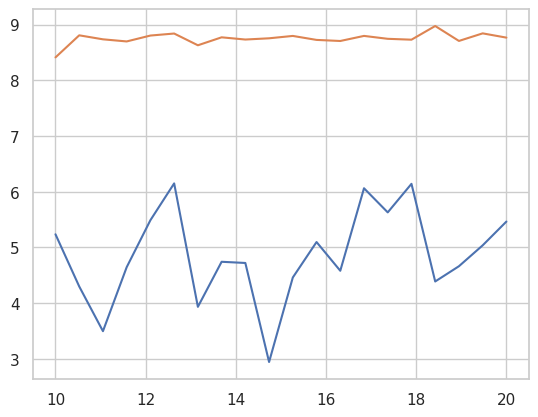

In [ ]:
plt.plot(intervalos, PA)
plt.plot(intervalos, PN)

In [ ]:
intervalos[np.where(PA == min(PA))[0]]

array([14.73684211])

* Se a codição de valor de compra for maior ou igual a 16.8 temos o pontos que minimiza a perda por aprovação. Inclusive, abaixo da perda por aprovação do modelo anterior


## Teste A/B para testar a minimização
1. **Objetivo:** Testar a minimização da perda de dinheiro por aprovação.
2. **Vamos Fazer:** Serão 2 ambientes
* Ambiente 1: Onde o modelo antigo decidirá qual compra é aprovada
* Ambiente 2: Onde a regra dura decidirá qual compra é aprovada

* Anotar os valores das compras, se o modelo aprovou e se era fraude ou não.
* Anotar os valores das compras, se a regra aprovou e se era fraude ou não.
3. **Avaliação do Teste**
* Calcular métrica de valor perdido por aprovação.
* Filtra por valores de aprovação com fraude.
* Realizar teste igualdade de média (teste-t)
